# Fix width binning (Equal Interval Width)


Raw counts that span several orders of magnitude are problematic for many models. One solution is to contain the scale by quantizing the count. In other words, we group the counts into bins, and get rid of the actual count values. Quantization maps a continuous number to a discrete one. We can think of the discretized numbers as an ordered sequence of bins that represent a measure of intensity.

In [1]:
import numpy as np


In [2]:
small_counts = np.random.randint(0, 100, 20)
small_counts

array([79, 38, 98, 20,  8, 10, 95, 71, 62, 29, 71, 62, 55, 93, 21, 63, 56,
        7, 22, 93])

In [3]:
# Map to evenly spaced bins 0-9 by division
np.floor_divide(small_counts, 10)

array([7, 3, 9, 2, 0, 1, 9, 7, 6, 2, 7, 6, 5, 9, 2, 6, 5, 0, 2, 9])

It means there are 10 groups ranged from 0 to 9. The number resulted from the `np.floor_divide` means the number of its group. 

In [4]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]

In [5]:
# Map to exponential-width bins via the log function
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

# Quantile binning

Fixed-width binning is easy to compute. But if there are large gaps in the counts, then there will be many empty bins with no data. This problem can be solved by adaptively positioning the bins based on the distribution of the data. This can be done using the quantiles of the distribution.

In [6]:
import pandas as pd
import json

In [7]:
# Load the data about businesses
biz_file = open('/Users/22statistika_04/Library/Mobile Documents/com~apple~CloudDocs/Documents/Subjects/Data Engineering/Data/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

In [16]:
biz_df.head(20)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,None,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Occurrence')

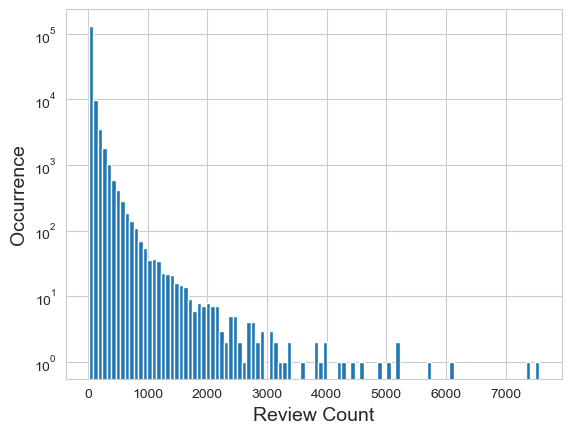

In [20]:
# Plot the histogram of the review counts
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=10)
ax.set_xlabel('Review Count', fontsize=14) 
ax.set_ylabel('Occurrence', fontsize=14)

From the histogram, there are many bins that are empty (no data)

In [11]:
# Divide into 10th, 20th, ..., 90th quantile (percentile)
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     6.0
0.2     7.0
0.3     9.0
0.4    11.0
0.5    15.0
0.6    20.0
0.7    30.0
0.8    48.0
0.9    97.0
Name: review_count, dtype: float64

Text(0, 0.5, 'Occurrence')

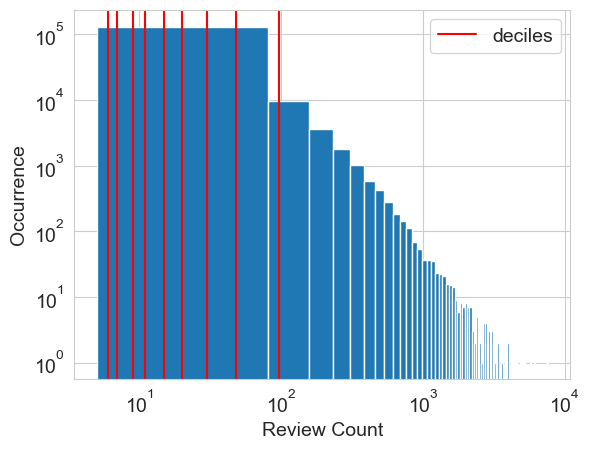

In [12]:
# Visualize the deciles on the histogram
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)

for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

The [`pandas.qcut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) for mapping the value into quantiles. 

Quantile-based discretization function. Discretize variable into equal-sized buckets based on rank or based on sample quantiles. For example 1000 values for 10 quantiles would produce a Categorical object indicating quantile membership for each data point.

In [21]:
# Mapping the binning with 10th, 20th, ..., 90th quantile
pd.qcut(biz_df['review_count'], 10, labels=False)

0         1
1         4
2         6
3         8
4         4
         ..
150341    4
150342    0
150343    2
150344    6
150345    2
Name: review_count, Length: 150346, dtype: int64

In [23]:
# Mapping the binning by putting labels
pd.qcut(biz_df['review_count'], 10, labels=['G1','G2','G3','G4','G5','G6','G7','G8','G9','G10'])

0         G2
1         G5
2         G7
3         G9
4         G5
          ..
150341    G5
150342    G1
150343    G3
150344    G7
150345    G3
Name: review_count, Length: 150346, dtype: category
Categories (10, object): ['G1' < 'G2' < 'G3' < 'G4' ... 'G7' < 'G8' < 'G9' < 'G10']

Please make sure that, in the `pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')`
q means the number of quantiles or llternately array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.

# EXERCISE

Download the data of [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/nurudeenabdulsalaam/fitbit-fitness-tracker-data?select=dailyIntensities_merged.csv) (click to follow the link).    
1. Read the data of 'dailyIntensities_merged'
2. Check on 'SedentaryMinutes' and 'FairlyActiveMinutes' 
3. What binning do you suggest?